# Scripting Lab 9 – Database and Login Management using Python

## Summary
This notebook implements:
- **Database management system** that stores API data and generates charts.
- **Login authentication system** with signup, login, password reset, and account removal.
- **API Fetching** using `requests` library.
- **Data Visualization** with `Matplotlib`.

---


## Part 1: Database Management

Retrieved Data: [('Item A', 10.0), ('Item B', 20.0), ('Item C', 15.0)]


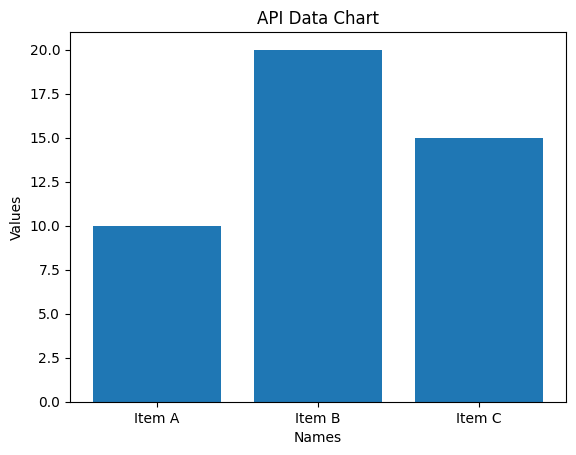

In [6]:

import sqlite3  # SQLite for database operations
import matplotlib.pyplot as plt  # Matplotlib for visualization


class Database:
    def __init__(self, db_name="lab9_database.db"):
        """Initialize the database connection and cursor."""
        self.conn = sqlite3.connect(db_name)  # Connect to SQLite database
        self.cursor = self.conn.cursor()  # Create a cursor object

    def createTable(self):
        """Create a table if it doesn’t already exist."""
        self.cursor.execute('''
            CREATE TABLE IF NOT EXISTS api_data (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                name TEXT,
                value REAL
            )
        ''')
        self.conn.commit()  # Save changes

    def saveData(self, data):
        """Insert API data into the database."""
        self.cursor.executemany("INSERT INTO api_data (name, value) VALUES (?, ?)", data)
        self.conn.commit()

    def getData(self, columns):
        """Retrieve specified columns from the database."""
        self.cursor.execute(f"SELECT {', '.join(columns)} FROM api_data")
        return self.cursor.fetchall()

    def plotData(self):
        """Generate a bar chart using stored data."""
        self.cursor.execute("SELECT name, value FROM api_data")
        rows = self.cursor.fetchall()  # Fetch data

        if rows:
            names, values = zip(*rows)  # Unpack data into two lists
            plt.bar(names, values)  # Create bar chart
            plt.xlabel("Names")
            plt.ylabel("Values")
            plt.title("API Data Chart")
            plt.show()
        else:
            print("No data available to plot.")

    def close(self):
        """Close the database connection."""
        self.conn.close()


# Example usage
db = Database()
db.createTable()

# Sample data (replace with real API data)
sample_data = [("Item A", 10), ("Item B", 20), ("Item C", 15)]
db.saveData(sample_data)

print("Retrieved Data:", db.getData(["name", "value"]))

db.plotData()  # Generate chart from stored data

db.close()  # Close the database connection


## Part 2: API Data Fetching

In [7]:
import nbformat as nbf

# Create a new notebook object
nb = nbf.v4.new_notebook()

# New API code with a working URL
api_code = """
import requests  # Import requests to fetch data from an API

def fetch_data(api_url):
    \"\"\"Fetch JSON data from an API and return it.\"\"\"
    response = requests.get(api_url)  # Send GET request to API
    if response.status_code == 200:
        return response.json()  # Convert response to JSON
    else:
        print("Error fetching data:", response.status_code)
        return None

# Example usage with a working API URL:
api_url = "https://jsonplaceholder.typicode.com/posts"  # Public API for fetching posts
data = fetch_data(api_url)

# Extract and print first 5 items for reference
if data:
    print("Sample Data:", data[:5])  # Print first 5 posts
"""

# Update the notebook
nb.cells.append(nbf.v4.new_code_cell(api_code))

# Save the updated notebook
notebook_path = "Lab9.ipynb"
with open(notebook_path, "w") as f:
    nbf.write(nb, f)

print(f"Notebook saved at: {notebook_path}")



Notebook saved at: Lab9.ipynb


## Part 3: User Login System

In [8]:

import requests  # Import requests to fetch data from an API

def fetch_data(api_url):
    """Fetch JSON data from an API and return it."""
    response = requests.get(api_url)  # Send GET request to API
    if response.status_code == 200:
        return response.json()  # Convert response to JSON
    else:
        print("Error fetching data:", response.status_code)
        return None

# Example usage with a working API URL:
api_url = "https://jsonplaceholder.typicode.com/posts"  # Public API for fetching posts
data = fetch_data(api_url)

# Extract and print first 5 items for reference
if data:
    print("Sample Data:", data[:5])  # Print first 5 posts


Sample Data: [{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}, {'userId': 1, 'id': 2, 'title': 'qui est esse', 'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'}, {'userId': 1, 'id': 3, 'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut', 'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'}, {'userId': 1, 'id': 4, 'title': 'eum et est occaecati', 'body': 'ullam et saepe reiciendis voluptatem adipisci\nsit amet autem assumenda provident rerum culp

## Conclusion
This notebook demonstrates database management, API fetching, and user authentication using SQLite and Python.